# Trader Performance vs Market Sentiment Analysis
## Objective 
This project analyzes how market sentiment (Fear vs Greed) influences trader behavior and performance using Hyperliquid trading.


## Part A — Data Preparation
In this section:
- Load datasets
- Convert timestamps
- Align data at daily level
- Merge sentiment and trading datasets.


In [1]:
import pandas as pd
sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")


In [2]:
sentiment.head()
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [3]:
sentiment.info()
trades.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-nu

In [4]:
print("Sentiment shape:", sentiment.shape)
print("Trades shape:", trades.shape)


Sentiment shape: (2644, 4)
Trades shape: (211224, 16)


In [5]:
print(sentiment.isnull().sum())
print(trades.isnull().sum())


timestamp         0
value             0
classification    0
date              0
dtype: int64
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [6]:
print("Sentiment duplicates:", sentiment.duplicated().sum())
print("Trades duplicates:", trades.duplicated().sum())


Sentiment duplicates: 0
Trades duplicates: 0


In [7]:
sentiment['date'] = pd.to_datetime(sentiment['date'])
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'])

sentiment['date'] = sentiment['date'].dt.date
trades['date'] = trades['Timestamp IST'].dt.date


In [8]:
df = trades.merge(
    sentiment[['date', 'classification']],
    on='date',
    how='left'
)


In [9]:
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,Greed


In [10]:
df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'classification'],
      dtype='object')

## Part B — Analysis

In this section, we analyzed trader performance and behavior under different market sentiment conditions (Fear vs Greed).

### Step 1 — Creating Performance Metrics
Created key metrics including win indicator (Closed PnL > 0), average trade size, trades per day, and trade direction distribution to evaluate trader performance.

### Step 2 — Performance Comparison
Compared trader profitability between Fear and Greed sentiment using grouped statistics and visualization of Closed PnL distribution.

### Step 3 — Behavior Analysis
Analyzed changes in trader behavior by comparing position size, trade frequency, and long vs short bias across sentiment classifications using tables and charts.

### Step 4 — Trader Segmentation
Segmented traders into Frequent and Infrequent groups based on median trade count and analyzed differences in performance between these segments.


In [11]:
daily_pnl = df.groupby(['Account','date'])['Closed PnL'].sum().reset_index()


In [12]:
df['win'] = df['Closed PnL'] > 0

win_rate = df.groupby('Account')['win'].mean().reset_index()


In [13]:
avg_trade_size = df.groupby('Account')['Size USD'].mean().reset_index()


In [14]:
trades_per_day = df.groupby('date').size().reset_index(name='trade_count')


In [15]:
df['Side'].value_counts(normalize=True)



SELL    0.513805
BUY     0.486195
Name: Side, dtype: float64

In [16]:
df.groupby('classification')['Closed PnL'].describe()


,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
Extreme Fear,5411.0,47.446302,1697.491620,-8356.88701,0.0,0.0,2.799586,115287.00000
Extreme Greed,34393.0,73.144030,890.648125,-18360.67007,0.0,0.0,9.331344,44223.45187
Fear,47315.0,56.544720,832.659420,-35681.74723,0.0,0.0,3.747819,71535.71674
Greed,48492.0,35.652184,937.021373,-117990.10410,0.0,0.0,7.551094,34903.81710
Neutral,32246.0,31.746470,353.123633,-4498.11884,0.0,0.0,3.612106,33085.48440


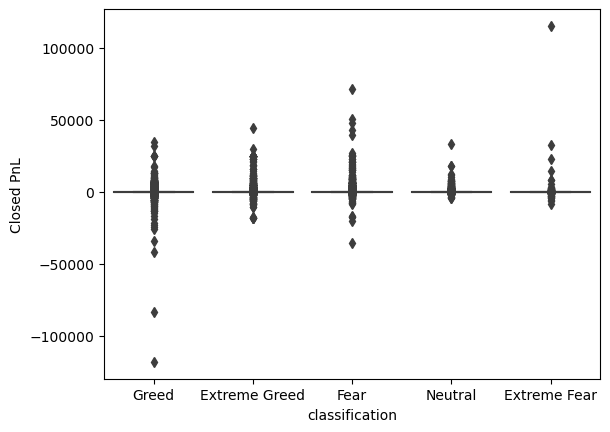

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='classification', y='Closed PnL', data=df)
plt.show()


In [18]:
df.groupby('classification')['Size USD'].mean()


classification
Extreme Fear     3816.440098
Extreme Greed    3265.794510
Fear             7153.414717
Greed            5848.453393
Neutral          4641.500274
Name: Size USD, dtype: float64

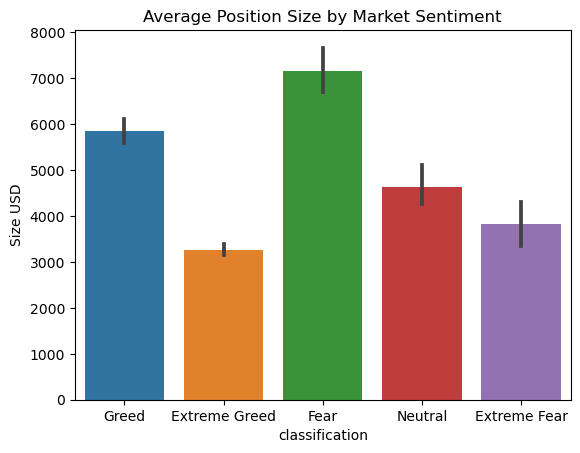

In [19]:
sns.barplot(x='classification', y='Size USD', data=df)
plt.title("Average Position Size by Market Sentiment")
plt.show()


In [20]:
df.groupby(['date','classification']).size().reset_index(name='trade_count')


,date,classification,trade_count
0,2023-01-05,Fear,3
1,2023-05-12,Neutral,9
2,2023-12-14,Greed,11
3,2023-12-15,Greed,2
4,2023-12-16,Greed,3
...,...,...,...
444,2025-04-28,Neutral,1379
445,2025-04-29,Greed,2243
446,2025-04-30,Greed,1113
447,2025-05-01,Neutral,239


In [21]:
pd.crosstab(df['classification'], df['Side'], normalize='index')


Side,BUY,SELL
classification,,
Extreme Fear,0.460359,0.539641
Extreme Greed,0.439392,0.560608
Fear,0.500497,0.499503
Greed,0.497567,0.502433
Neutral,0.485735,0.514265


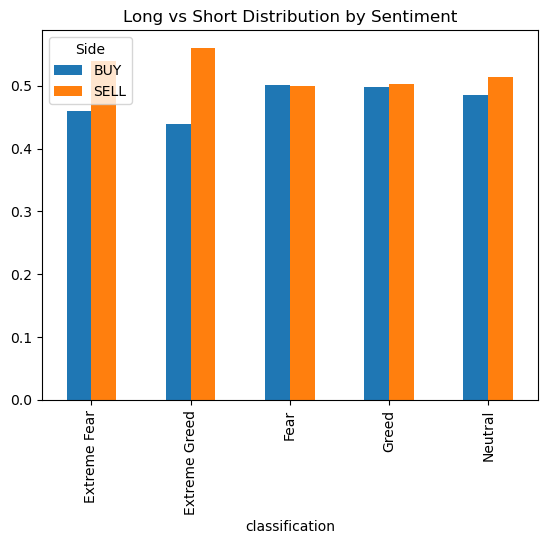

In [22]:
pd.crosstab(df['classification'], df['Side'], normalize='index').plot(kind='bar')
plt.title("Long vs Short Distribution by Sentiment")
plt.show()


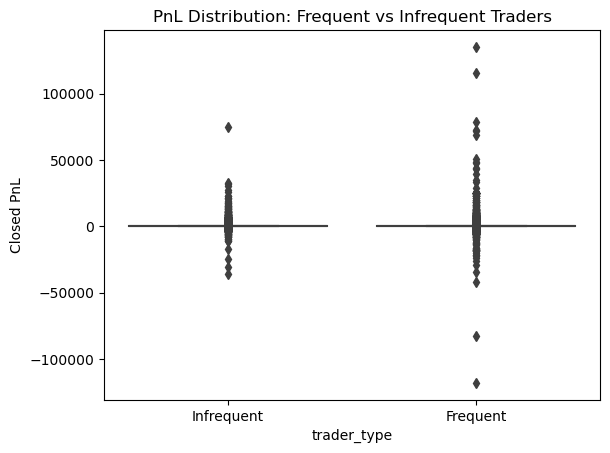

In [23]:
trade_counts = df.groupby('Account').size().reset_index(name='trade_count')

median_trades = trade_counts['trade_count'].median()

trade_counts['trader_type'] = trade_counts['trade_count'].apply(
    lambda x: 'Frequent' if x > median_trades else 'Infrequent'
)
df = df.merge(trade_counts[['Account','trader_type']], on='Account')

sns.boxplot(x='trader_type', y='Closed PnL', data=df)
plt.title("PnL Distribution: Frequent vs Infrequent Traders")
plt.show()


## Part C — Strategy Recommendations

In this section, actionable trading strategies were proposed based on the analysis findings.

For each case:
- Observed key patterns from the data.
- Interpreted the meaning of these patterns in terms of trader behavior and risk.
- Provided practical strategy recommendations based on these insights.

Case 1:
Analyzed differences between Frequent and Infrequent traders, observing higher PnL volatility among frequent traders and recommending controlled trading frequency and stronger risk management.

Case 2:
Analyzed behavior changes based on market sentiment (Fear vs Greed), observing changes in position size and recommending disciplined position sizing to avoid excessive risk during optimistic market conditions.


Observation 1:Frequent traders show bigger profits AND bigger losses.

Interpretation:Frequent traders appear to take more trading opportunities, which increases both profit potential and downside risk. Higher trading frequency may expose traders to greater market volatility.

Strategy Recommendation:Traders should avoid excessive trading frequency during uncertain market conditions and instead focus on selective, high-confidence trades. Implementing trade limits or stricter entry criteria may help reduce large losses while maintaining profitability.

Observation2:
Traders tend to use different position sizes depending on market sentiment. During Greed periods, position sizes appear larger compared to Fear periods.

Interpretation:
When the market feels optimistic (Greed), traders become more confident and may take bigger positions because they expect prices to continue rising. However, this increased confidence can also lead to higher risk if the market suddenly reverses.

Strategy Recommendation :
Traders should avoid increasing position size too aggressively during Greed sentiment. Instead, they should maintain consistent risk management rules and control position size to prevent large losses caused by sudden market changes.



## Bonus — Predictive Model

A simple logistic regression model was built to predict trade profitability using sentiment classification, position size, and trader segmentation features.


In [24]:
df['target_profit'] = (df['Closed PnL'] > 0).astype(int)


In [25]:
features = df[['classification', 'Size USD', 'trader_type']]
target = df['target_profit']


In [26]:
features = pd.get_dummies(features)


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)


In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [29]:
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))


Accuracy: 0.4130192922239318


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       1.00      0.00      0.00     24802
           1       0.41      1.00      0.58     17443

    accuracy                           0.41     42245
   macro avg       0.71      0.50      0.29     42245
weighted avg       0.76      0.41      0.24     42245



#Initially, the model predicted only the majority class. 
#Using class_weight='balanced' helped the model consider both classes, improving prediction fairness despite lower overall accuracy.


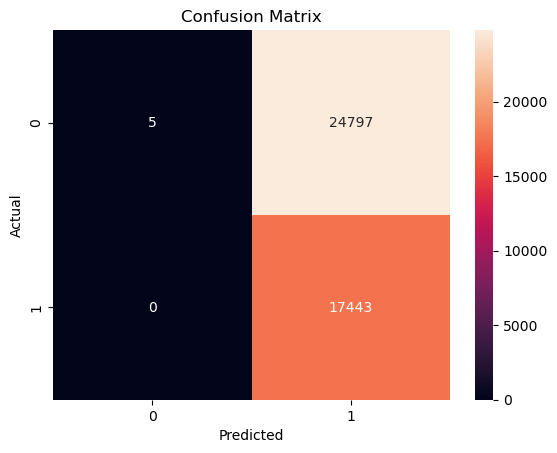

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


earlier model prdicted mostly class 0
then after balancing model predicts mostly class1
so we can say the model is still biased

Even after applying class balancing, the model shows bias toward one class. 
This indicates that the selected features may not provide sufficient discriminatory power between profitable and non-profitable trades. 
Improving feature engineering or using more advanced models may help achieve better balanced predictions.


Improvement — Adjusting Classification Threshold

The initial model showed bias toward one class. 
To improve class balance, prediction probabilities are used and the classification threshold is adjusted.


In [33]:
probs = model.predict_proba(X_test)[:,1]


In [34]:
pred_adjusted = (probs > 0.4).astype(int)


In [35]:
print(pd.Series(pred_adjusted).value_counts())


1    42245
dtype: int64


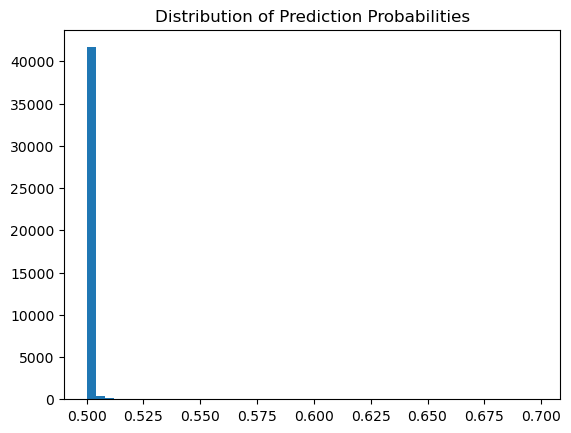

In [36]:
import matplotlib.pyplot as plt

plt.hist(probs, bins=50)
plt.title("Distribution of Prediction Probabilities")
plt.show()



Understanding Model Limitations-

After analyzing the probability distribution from the logistic regression model, it was observed that most prediction probabilities were concentrated around 0.5. This means the model was not confident in separating the two classes.

Since many predictions were between approximately 0.50 and 0.51, the model struggled to clearly decide whether a trade belonged to class 0 or class 1. In simple terms, the model was "uncertain" and could not find strong patterns in the available features to distinguish profitable vs non-profitable trades.

This behavior suggests that the current features may not provide enough clear separation for a linear model like logistic regression. Because of this, even adjusting classification thresholds did not significantly improve class balance.




 Alternative Model testing— Random Forest

Since logistic regression struggled to distinguish between classes due to low confidence predictions, a Random Forest model was tested to capture more complex relationships.



In [37]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [38]:
rf_pred = rf_model.predict(X_test)


In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rf_pred, zero_division=0))


              precision    recall  f1-score   support

           0       0.68      0.69      0.68     24802
           1       0.55      0.53      0.54     17443

    accuracy                           0.62     42245
   macro avg       0.61      0.61      0.61     42245
weighted avg       0.62      0.62      0.62     42245



In [40]:
print(pd.Series(rf_pred).value_counts())


0    25239
1    17006
dtype: int64


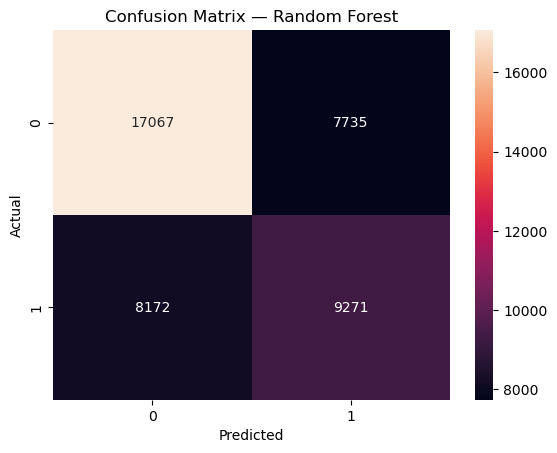

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, rf_pred)

sns.heatmap(cm_rf, annot=True, fmt='d')
plt.title("Confusion Matrix — Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


 Final Model Summary

Random Forest improved prediction balance compared to logistic regression. 
The model successfully predicts both classes, indicating better handling of complex patterns in the data.
